In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

/Users/nlarusstone/.virtualenvs/bbcache/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def prettify_ax(ax):
    """
    Nifty function we can use to make our axes more pleasant to look at
    """
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(8,6), **kwargs):
    """
    Shortcut to make and 'prettify' a simple figure with 1 axis
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

In [3]:
# Constants
lw = 2 #linewidth
fs = 12 #fontsize

In [4]:
# Helper functions
def parse_prefix_sums(p):
    return np.sum([int(q.split(':')[1]) for q in p.split(';') if q])

In [25]:
cap = '../logs/thesis/pmap/for-compas_1_train.out-curious_lb-with_captured_symmetry_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
cap_df = pd.read_csv(cap)
cap_df.fillna('', inplace=True)
cap_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,objective_num,tree_insertion_time,tree_insertion_num,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,1.490660e+09,0.0,0.0,0.0,0.000000,0,0.000000,0,0.000000,1,...,0,8,0,0,0,0,0,0,1,0:1;
1,8.311270e-04,0.0,0.0,0.0,0.000013,1,0.000296,1,0.000000,1,...,0,10,0,0,0,0,0,0,159,0:1;
2,9.610650e-04,0.0,0.0,0.0,0.000015,2,0.000300,2,0.000006,2,...,0,156,1,0,8,1,0,0,159,0:1;1:1;
3,1.119140e-03,0.0,0.0,0.0,0.000024,9,0.000325,9,0.000012,9,...,0,1178,8,0,64,8,0,0,159,0:1;1:8;
4,1.270060e-03,0.0,0.0,0.0,0.000036,18,0.000351,18,0.000018,16,...,0,2200,15,0,128,15,0,0,159,0:1;1:15;


In [6]:
corels = '../logs/thesis/for-compas_1_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
corels_df = pd.read_csv(corels)
corels_df.fillna('', inplace=True)
corels_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,objective_num,tree_insertion_time,tree_insertion_num,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000013,0.0,0.000000,0.0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0,0,0,0,0,0,159,
1,0.000105,0.0,0.000000,0.0,0.000000,0,0.000000,0,0.000000,1,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.000263,0.0,0.000003,0.0,0.000004,6,0.000008,6,0.000004,6,...,0,730,5,0,64,5,0,0,159,0:1;1:5;
3,0.000314,0.0,0.000003,0.0,0.000006,8,0.000014,8,0.000006,8,...,0,1018,7,0,64,7,0,0,159,0:1;1:7;
4,0.000371,0.0,0.000003,0.0,0.000008,10,0.000018,10,0.000006,9,...,0,1162,8,0,64,8,0,0,159,0:1;1:8;


In [7]:
bfs = '../logs/thesis/for-compas_1_train.out-bfs-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
bfs_df = pd.read_csv(bfs)
bfs_df.fillna('', inplace=True)
bfs_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,tree_insertion_time,tree_insertion_num,queue_insetion_time,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000018,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,159,
1,0.000156,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,1,0.000000,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.000523,0.0,0.000004,0.0,0.000029,6,0.000047,0.000009,6,0.000017,...,0,730,5,0,64,5,0,0,159,0:1;1:5;
3,0.000693,0.0,0.000004,0.0,0.000031,8,0.000070,0.000013,8,0.000019,...,0,1018,7,0,64,7,0,0,159,0:1;1:7;
4,0.000857,0.0,0.000004,0.0,0.000033,10,0.000083,0.000014,9,0.000020,...,0,1162,8,0,64,8,0,0,159,0:1;1:8;


In [8]:
support = '../logs/thesis/for-compas_1_train.out-curious_lb-with_prefix_perm_map-minor-removed=support-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
support_df = pd.read_csv(support)
support_df.fillna('', inplace=True)
support_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,tree_insertion_time,tree_insertion_num,queue_insetion_time,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000031,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,159,
1,0.000138,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,1,0.000000,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.000433,0.0,0.000003,0.0,0.000010,6,0.000010,0.000002,6,0.000002,...,0,728,5,0,64,5,0,0,159,0:1;1:5;
3,0.000483,0.0,0.000003,0.0,0.000011,8,0.000018,0.000002,8,0.000003,...,0,1016,7,0,64,7,0,0,159,0:1;1:7;
4,0.000510,0.0,0.000003,0.0,0.000013,10,0.000021,0.000002,9,0.000004,...,0,1160,8,0,64,8,0,0,159,0:1;1:8;


In [70]:
pmap = '../logs/thesis/for-compas_1_train.out-curious_lb-no_pmap-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
pmap_df = pd.read_csv(pmap)
pmap_df.fillna('', inplace=True)
pmap_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,tree_insertion_time,tree_insertion_num,queue_insetion_time,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000613,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,159,
1,0.000718,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,1,0.000000,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.001840,0.0,0.000003,0.0,0.000013,6,0.000012,0.000002,6,0.000014,...,0,730,5,0,64,0,0,0,159,0:1;1:5;
3,0.001954,0.0,0.000003,0.0,0.000015,8,0.000021,0.000004,8,0.000014,...,0,1018,7,0,64,0,0,0,159,0:1;1:7;
4,0.002065,0.0,0.000003,0.0,0.000018,10,0.000026,0.000004,9,0.000015,...,0,1162,8,0,64,0,0,0,159,0:1;1:8;


In [10]:
lookahead = '../logs/thesis/for-compas_1_train.out-curious_lb-with_prefix_perm_map-minor-removed=lookahead-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
lookahead_df = pd.read_csv(lookahead)
lookahead_df.fillna('', inplace=True)
lookahead_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,tree_insertion_time,tree_insertion_num,queue_insetion_time,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000019,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,159,
1,0.000100,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,1,0.000000,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.000363,0.0,0.000003,0.0,0.000007,6,0.000014,0.000003,6,0.000002,...,0,730,5,0,64,5,0,0,159,0:1;1:5;
3,0.000449,0.0,0.000003,0.0,0.000009,8,0.000026,0.000004,8,0.000003,...,0,1018,7,0,64,7,0,0,159,0:1;1:7;
4,0.000528,0.0,0.000003,0.0,0.000011,10,0.000038,0.000004,10,0.000005,...,0,1306,9,0,128,9,0,0,159,0:1;1:9;


In [11]:
equiv = '../logs/thesis/for-compas_1_train.out-curious_lb-with_prefix_perm_map-no_minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
equiv_df = pd.read_csv(equiv)
equiv_df.fillna('', inplace=True)
equiv_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,tree_insertion_time,tree_insertion_num,queue_insetion_time,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,0.000567,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000e+00,0,0.000000,...,0,0,0,0,0,0,0,0,159,
1,0.000640,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000e+00,1,0.000000,...,0,8,1,0,8,0,0,0,159,0:1;
2,0.001513,0.0,0.000002,0.0,0.000002,6,0.000016,9.536740e-07,6,0.000004,...,0,730,5,0,64,5,0,0,159,0:1;1:5;
3,0.001574,0.0,0.000002,0.0,0.000004,8,0.000026,2.145770e-06,8,0.000005,...,0,1018,7,0,64,7,0,0,159,0:1;1:7;
4,0.001616,0.0,0.000002,0.0,0.000006,10,0.000029,3.099440e-06,10,0.000005,...,0,1306,9,0,128,9,0,0,159,0:1;1:9;


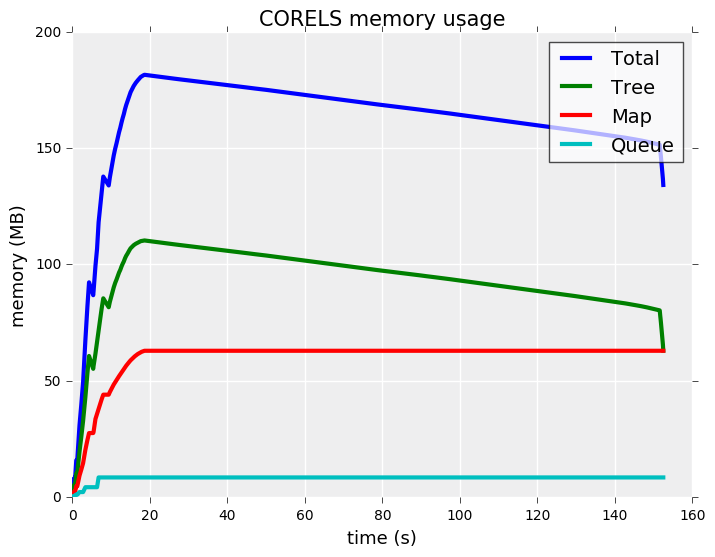

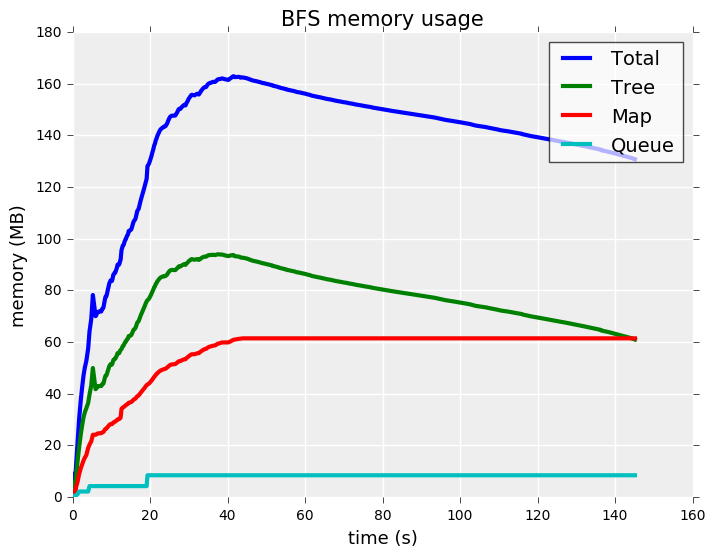

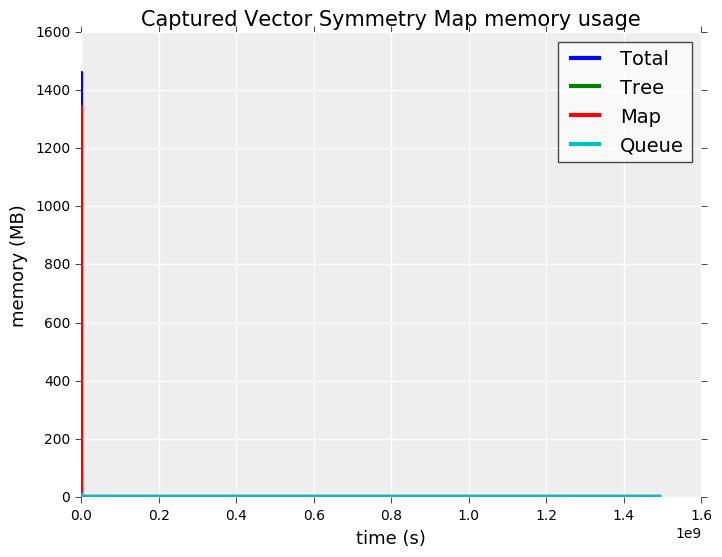

In [26]:
#Mem vs Time
def mem_time_plot(df, title=None):
    fig, ax = simple_ax()
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111)
    ax.plot(df['total_time'], (df['permutation_map_memory'] + df['tree_memory'] + df['queue_memory']) / 10 ** 6, label='Total',
           linewidth=lw+1)
    ax.plot(df['total_time'], df['tree_memory'] / 10 ** 6, label='Tree', linewidth=lw+1)
    ax.plot(df['total_time'], df['permutation_map_memory'] / 10 ** 6, label='Map', linewidth=lw+1)
    ax.plot(df['total_time'], df['queue_memory'] / 10 ** 6, label='Queue', linewidth=lw+1)
    #ax.set_yscale('log')
    ax.set_ylabel('memory (MB)', {'size': fs+1})
    ax.set_xlabel('time (s)', {'size': fs+1})
    ax.set_title(title + ' memory usage',fontsize=fs+3)
    plt.legend(fontsize=fs + 2, framealpha=0.7, loc='upper right')
    plt.show()
mem_time_plot(corels_df, 'CORELS')
mem_time_plot(bfs_df, 'BFS')
mem_time_plot(cap_df, 'Captured Vector Symmetry Map')

In [22]:
corels_df.columns

Index([u'total_time', u'evaluate_children_time', u'node_select_time',
       u'rule_evaluation_time', u'lower_bound_time', u'lower_bound_num',
       u'objective_time', u'tree_insertion_time', u'tree_insertion_num',
       u'queue_insetion_time', u'permutation_map_insertion_time',
       u'permutation_map_insertion_num', u'permutation_map_memory',
       u'current_lower_bound', u'tree_min_objective', u'tree_prefix_length',
       u'tree_num_nodes', u'tree_num_evaluated', u'tree_memory', u'queue_size',
       u'queue_min_length', u'queue_memory', u'pmap_size', u'pmap_null_num',
       u'pmap_discard_num', u'log_remaining_space_size', u'prefix_lengths'],
      dtype='object')

In [14]:
def obj_change(df):
    return df[(df['tree_min_objective'].shift() != df['tree_min_objective'])]
corels_obj_df = obj_change(corels_df)

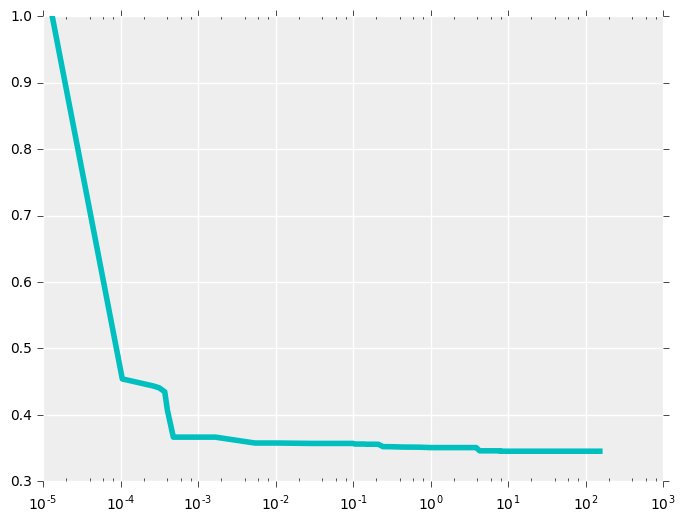

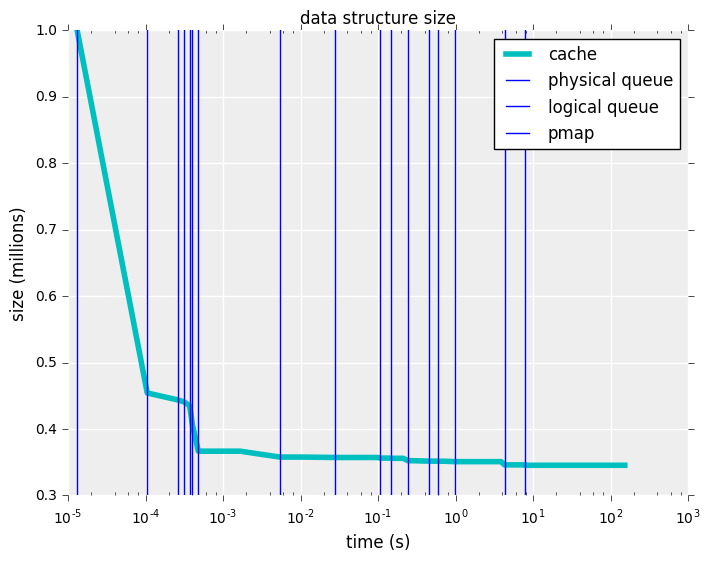

In [15]:
def cache_phys_log_pmap(df):
    fig, ax = simple_ax()
    prefix_sums = np.array([parse_prefix_sums(p) for p in df['prefix_lengths']])
    #ax.semilogx(df['total_time'], df['tree_insertion_num'], 'b-', linewidth=lw*2)
    ax.semilogx(df['total_time'], df['tree_min_objective'], 'c-', linewidth=lw*2)
    #ax.semilogx(df['total_time'], prefix_sums / 10.**6, 'm-', linewidth=lw)
    #ax.semilogx(df['total_time'], df['pmap_size'] / 10.**6, 'y--', linewidth=lw*2)
    for i, row in corels_obj_df.iterrows():
        plt.axvline(x=row['total_time'])
    ax.set_xlabel('time (s)', fontsize=fs)
    ax.set_ylabel('size (millions)', fontsize=fs)
    ax.set_title('data structure size', fontsize=fs)
    #ax.set_xticks(fontsize=fs-1)
    #ax.set_yticks(fontsize=fs-1)
    plt.legend(['cache', 'physical queue', 'logical queue', 'pmap'], fontsize=fs, loc='best')
    plt.show()
cache_phys_log_pmap(corels_df)
#cache_phys_log_pmap(cap_df)

In [70]:
df.columns

Index([u'total_time', u'evaluate_children_time', u'node_select_time',
       u'rule_evaluation_time', u'lower_bound_time', u'lower_bound_num',
       u'objective_time', u'tree_insertion_time', u'tree_insertion_num',
       u'queue_insetion_time', u'permutation_map_insertion_time',
       u'permutation_map_insertion_num', u'permutation_map_memory',
       u'current_lower_bound', u'tree_min_objective', u'tree_prefix_length',
       u'tree_num_nodes', u'tree_num_evaluated', u'tree_memory', u'queue_size',
       u'queue_min_length', u'queue_memory', u'pmap_size', u'pmap_null_num',
       u'pmap_discard_num', u'log_remaining_space_size', u'prefix_lengths'],
      dtype='object')

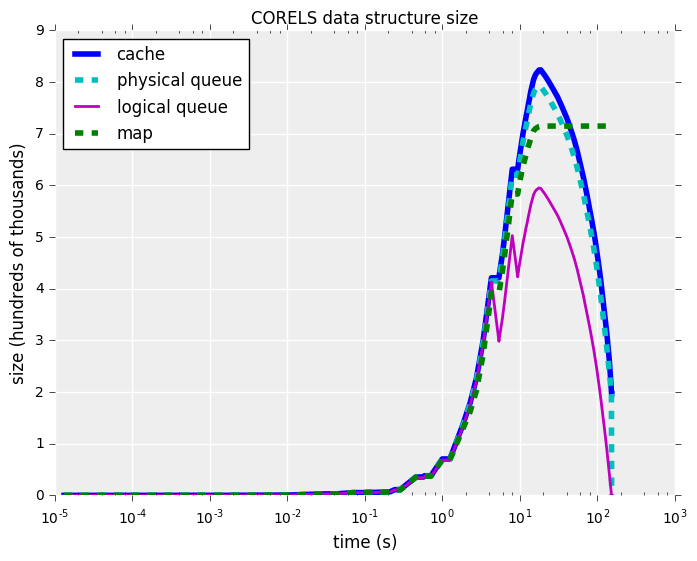

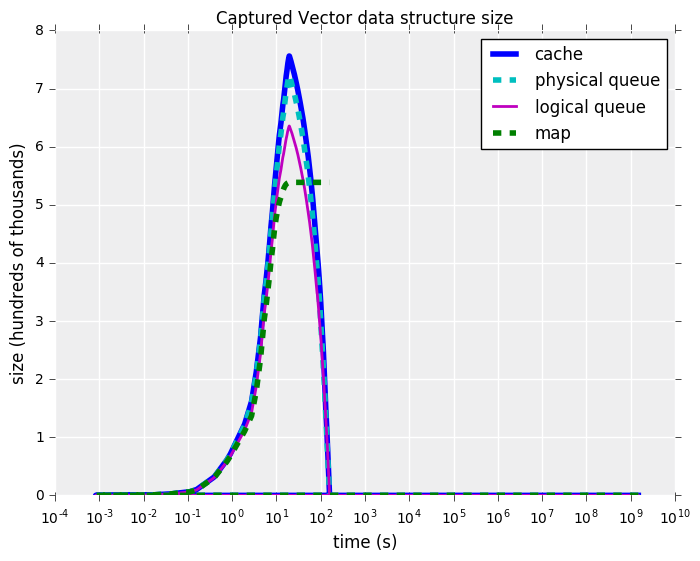

In [27]:
# Cache size vs Phys queue size vs Logical queue size
def cache_phys_log_pmap(df, title):
    fig, ax = simple_ax()
    prefix_sums = np.array([parse_prefix_sums(p) for p in df['prefix_lengths']])
    ax.semilogx(df['total_time'], df['tree_num_nodes'] / 10.**5, 'b-', linewidth=lw*2)
    ax.semilogx(df['total_time'], df['queue_size'] / 10.**5, 'c--', linewidth=lw*2)
    ax.semilogx(df['total_time'], prefix_sums / 10.**5, 'm-', linewidth=lw)
    ax.semilogx(df['total_time'], df['pmap_size'] / 10.**5, 'g--', linewidth=lw*2)
    #ax.semilogx(df['total_time'], df['tree_insertion_num'] / 10.**6, 'y-', linewidth=lw*2)
    ax.set_xlabel('time (s)', fontsize=fs)
    ax.set_ylabel('size (hundreds of thousands)', fontsize=fs)
    ax.set_title(title + ' data structure size', fontsize=fs)
    #ax.set_xticks(fontsize=fs-1)
    #ax.set_yticks(fontsize=fs-1)
    plt.legend(['cache', 'physical queue', 'logical queue', 'map', 'items examined'], fontsize=fs, loc='best')
    plt.show()
cache_phys_log_pmap(corels_df, 'CORELS')
cache_phys_log_pmap(cap_df, 'Captured Vector')

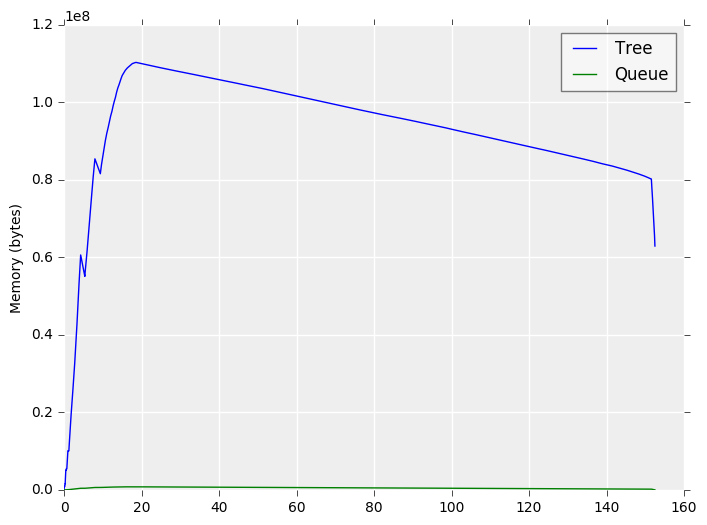

In [28]:
#Mem vs Time
def mem_plot(df):
    fig, ax = simple_ax()
    #ax.semilogx(df['total_time'], df['permutation_map_memory'], label='Map')
    ax.plot(df['total_time'], df['tree_memory'], label='Tree')
    ax.plot(df['total_time'], df['queue_size'], label='Queue')
    #ax.semilogx(df['total_time'], df['queue_memory'], label='Queue')
    #ax.set_yscale('log')
    ax.set_ylabel('Memory (bytes)')
    #ax.set_xlabel('Time (s)')
    plt.legend(fontsize=fs, framealpha=0.5, loc='best')
    plt.show()
mem_plot(corels_df)

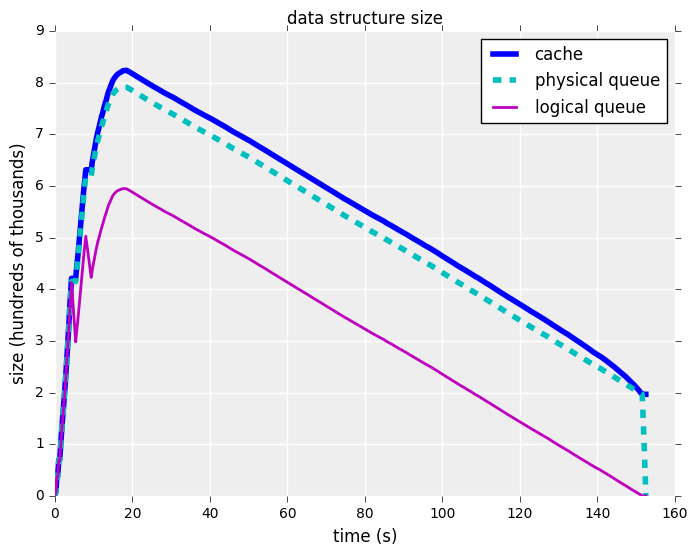

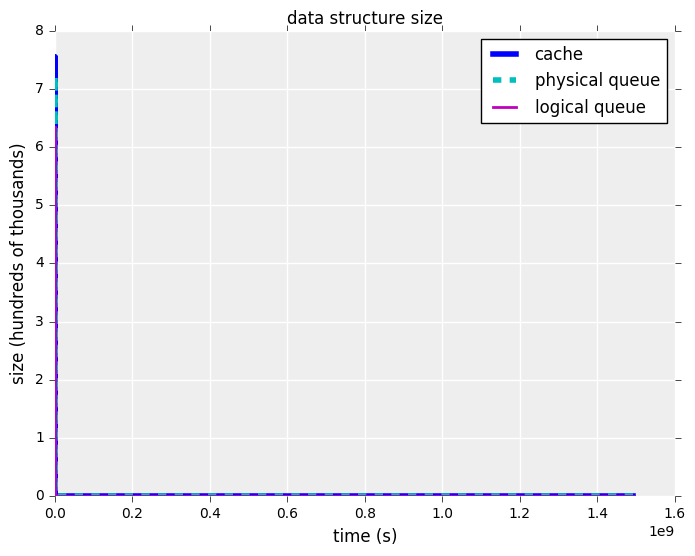

In [29]:
# Cache size vs Phys queue size vs Logical queue size
def cache_phys_log(df):
    fig, ax = simple_ax()
    prefix_sums = np.array([parse_prefix_sums(p) for p in df['prefix_lengths']])
    ax.plot(df['total_time'], df['tree_num_nodes'] / 10.**5, 'b-', linewidth=lw*2)
    ax.plot(df['total_time'], df['queue_size'] / 10.**5, 'c--', linewidth=lw*2)
    ax.plot(df['total_time'], prefix_sums / 10.**5, 'm-', linewidth=lw)
    ax.set_xlabel('time (s)', fontsize=fs)
    ax.set_ylabel('size (hundreds of thousands)', fontsize=fs)
    ax.set_title('data structure size', fontsize=fs)
    #ax.set_xticks(fontsize=fs-1)
    #ax.set_yticks(fontsize=fs-1)
    plt.legend(['cache', 'physical queue', 'logical queue'], fontsize=fs, loc='upper right')
    plt.show()
cache_phys_log(corels_df)
cache_phys_log(cap_df)

In [30]:
dfs = []
for i in range(10):
    df = pd.read_csv('../logs/keep/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=1000000000-c=0.0050000-v=1-f=1000.txt'.format(i))
    dfs.append(df)

In [31]:
corels_df.columns

Index([u'total_time', u'evaluate_children_time', u'node_select_time',
       u'rule_evaluation_time', u'lower_bound_time', u'lower_bound_num',
       u'objective_time', u'objective_num', u'tree_insertion_time',
       u'tree_insertion_num', u'queue_insertion_time',
       u'evaluate_children_num', u'permutation_map_insertion_time',
       u'permutation_map_insertion_num', u'permutation_map_memory',
       u'current_lower_bound', u'tree_min_objective', u'tree_prefix_length',
       u'tree_num_nodes', u'tree_num_evaluated', u'tree_memory', u'queue_size',
       u'queue_min_length', u'queue_memory', u'pmap_size', u'pmap_null_num',
       u'pmap_discard_num', u'log_remaining_space_size', u'prefix_lengths'],
      dtype='object')

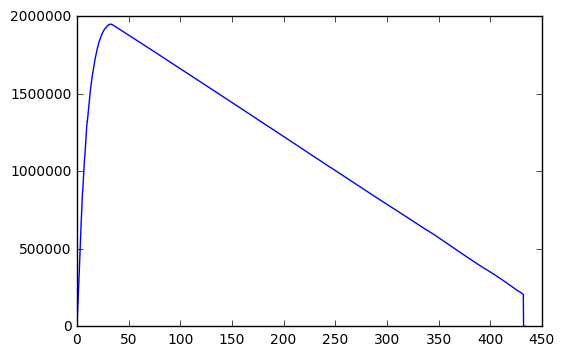

In [32]:
plt.plot(df['total_time'], df['queue_size'])
plt.show()

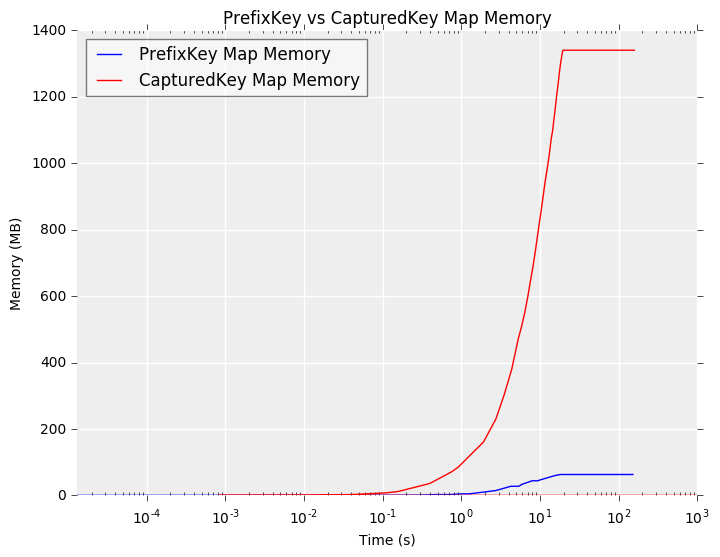

In [46]:
fig, ax = simple_ax(figsize=(8,6))
ax.semilogx(corels_df['total_time'], corels_df['permutation_map_memory'] / 10 ** 6, 'b', label='PrefixKey Map Memory')
ax.semilogx(cap_df['total_time'], cap_df['permutation_map_memory'] / 10 ** 6, 'r', label='CapturedKey Map Memory')
ax.set_xlim([0, 1000])
ax.set_ylabel('Memory (MB)')
ax.set_xlabel('Time (s)')
ax.set_title('PrefixKey vs CapturedKey Map Memory')
plt.legend(fontsize=fs, framealpha=0.5, loc='best')
plt.show()
#mem_time_plot(corels_df, 'CORELS')
#mem_time_plot(cap_df, 'Captured Vector Symmetry Map')

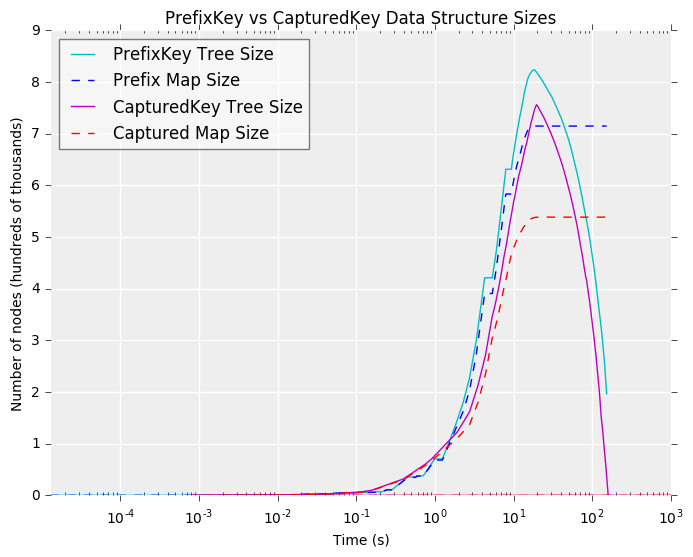

In [45]:
fig, ax = simple_ax(figsize=(8,6))
ax.semilogx(corels_df['total_time'], corels_df['tree_num_nodes'] / 10 ** 5, 'c-', label='PrefixKey Tree Size')
ax.semilogx(corels_df['total_time'], corels_df['pmap_size'] / 10 ** 5, 'b--', label='Prefix Map Size')
ax.semilogx(cap_df['total_time'], cap_df['tree_num_nodes'] / 10 ** 5, 'm-', label='CapturedKey Tree Size')
ax.semilogx(cap_df['total_time'], cap_df['pmap_size'] / 10 ** 5, 'r--', label='Captured Map Size')
ax.set_ylabel('Number of nodes (hundreds of thousands)')
ax.set_xlabel('Time (s)')
ax.set_xlim([0, 1000])
ax.set_title('PrefixKey vs CapturedKey Data Structure Sizes')
plt.legend(fontsize=fs, framealpha=0.5, loc='best')
plt.show()

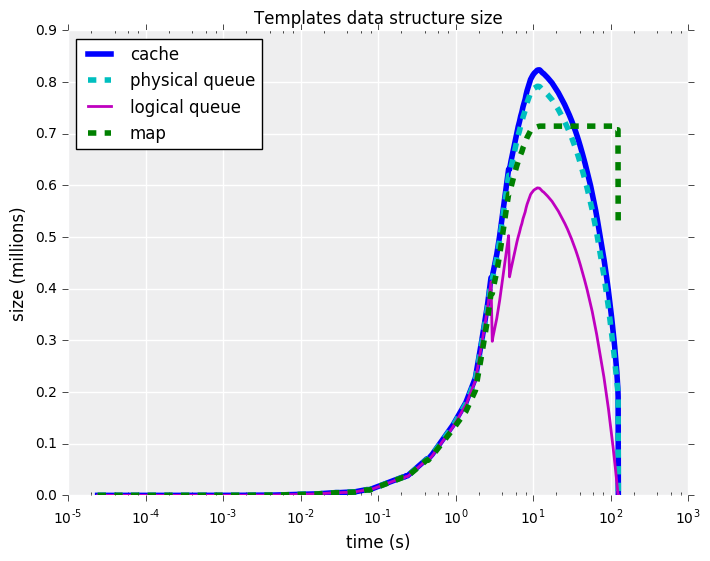

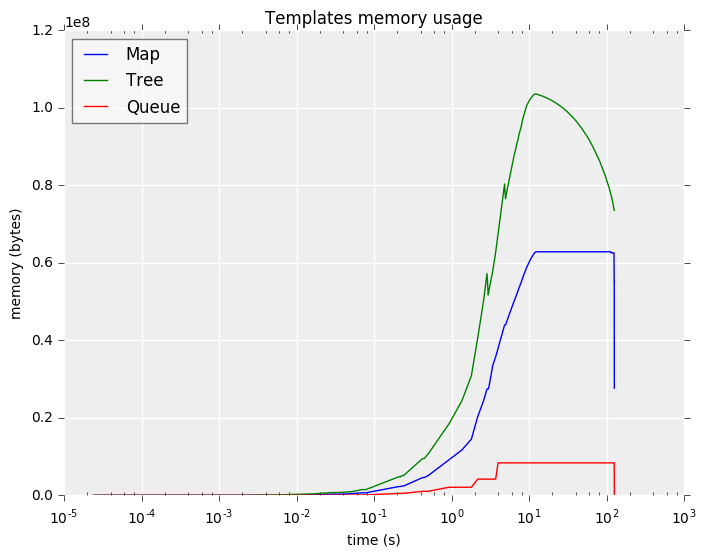

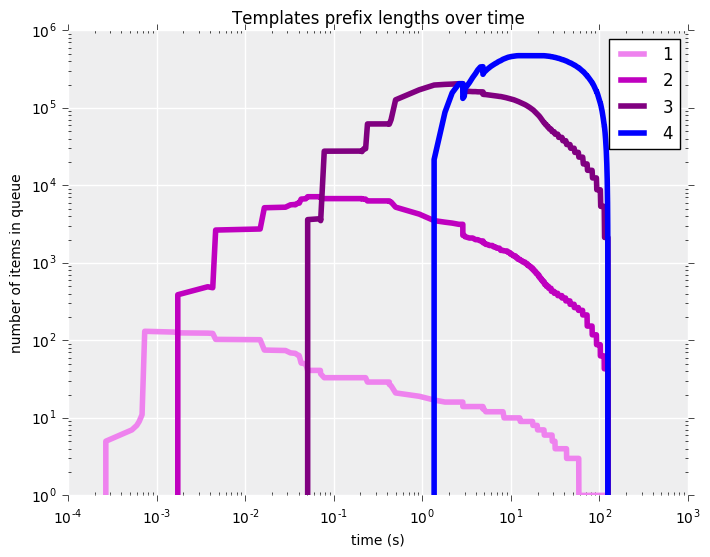

In [283]:
templates = '../logs/thesis/templates/for-compas_1_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
templates_df = pd.read_csv(templates)
templates_df.fillna('', inplace=True)
templates_df.head()
cache_phys_log_pmap(templates_df, 'Templates')
mem_time_plot(templates_df, 'Templates')
prefix_sz(templates_df, 'Templates')

Max q 595110
Max K 4


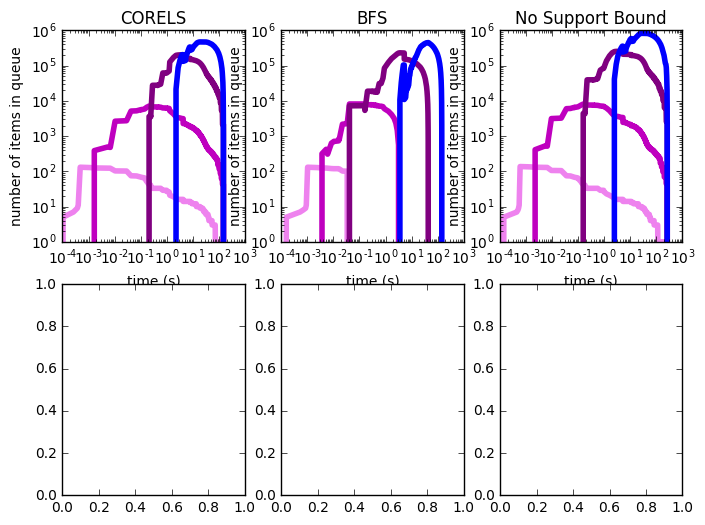

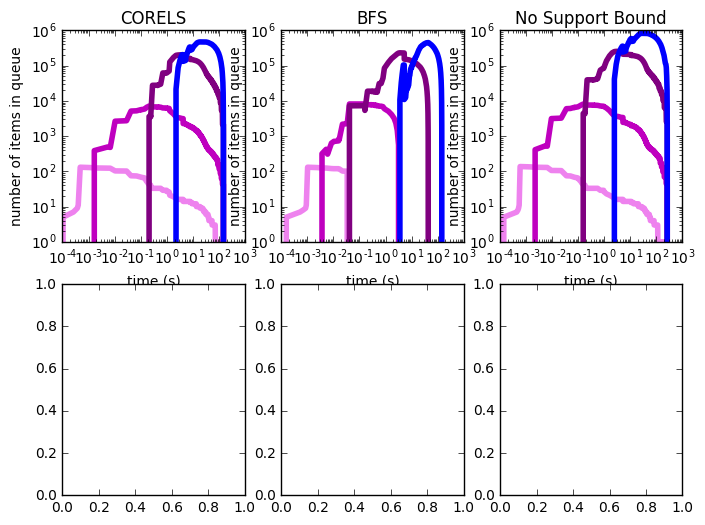

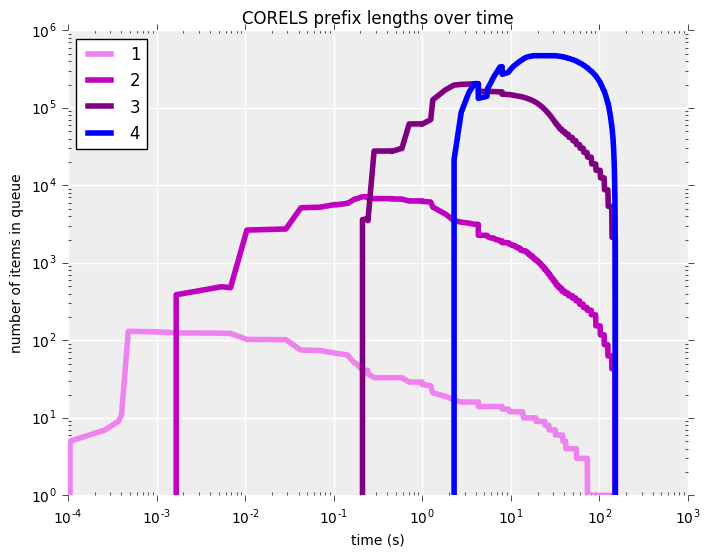

Max q 473995
Max K 4


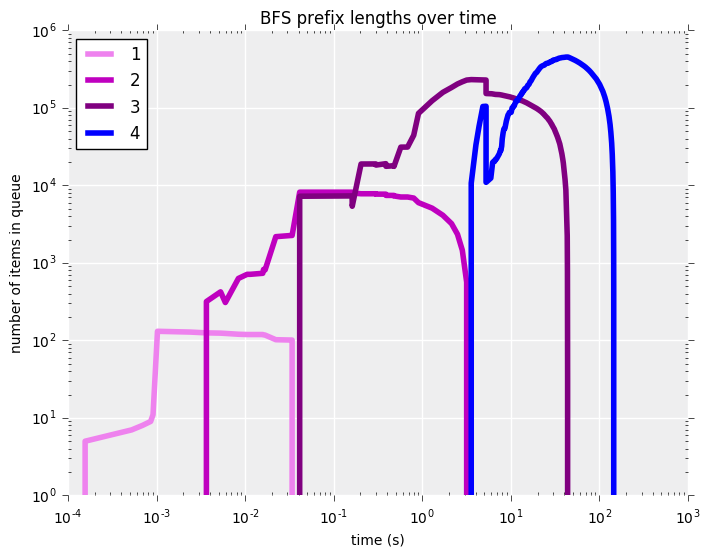

Max q 983549
Max K 4


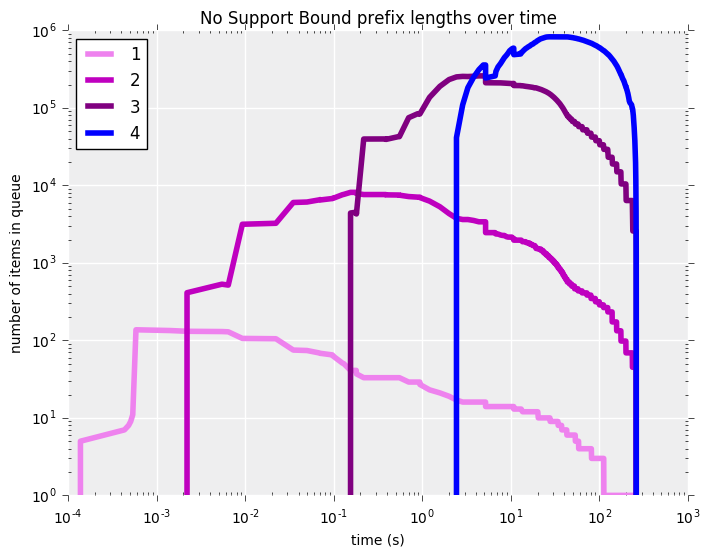

Max q 5628855
Max K 4


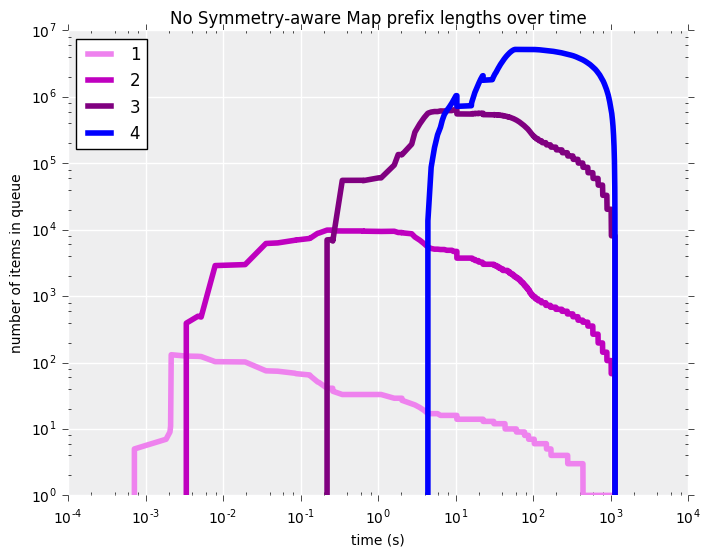

Max q 10732836
Max K 5


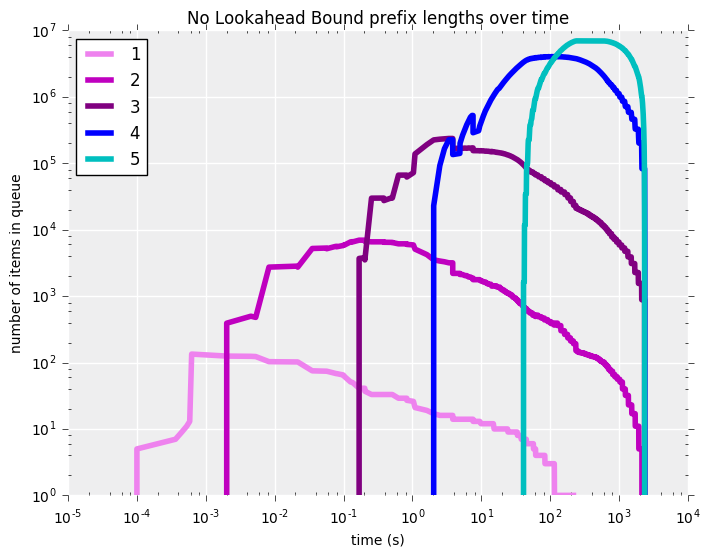

Max q 28208739
Max K 7


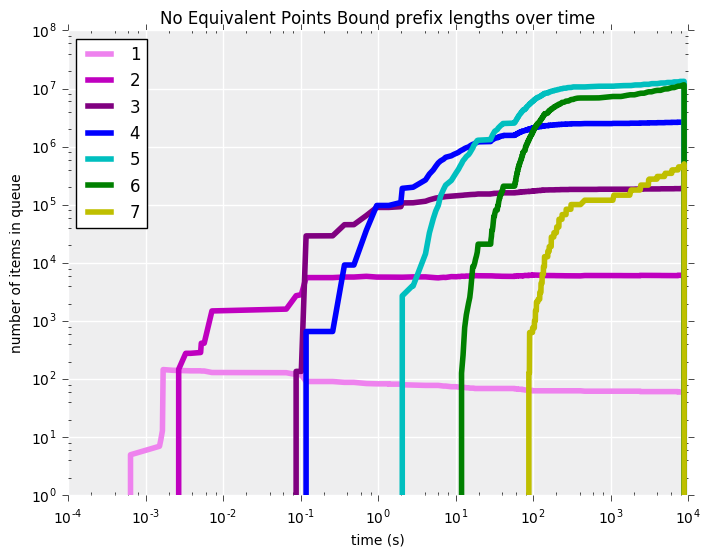

In [71]:
def prefix_sz(df, title):
    fig, ax = simple_ax()
    color_vec = ['k', 'violet', 'm', 'purple', 'b', 'c', 'g', 'y', 'orange', 'r']
    #color_vec = ['r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'm', 'violet', 'pink', 'gray', 'k']
    prefix_lengths = list(df['prefix_lengths'])
    max_length = max(set([int(lc.split(':')[0]) for lc in ''.join(prefix_lengths).split(';') if lc]))
    split_hist = [[lc.split(':') for lc in lh.strip(';').split(';')] for lh in prefix_lengths][1:]
    lens = range(1, max_length + 1)
    kvp = [[(int(lc[0]), int(lc[1])) for lc in lh if (len(lc) == 2)] for lh in split_hist]
    zc = pd.DataFrame()
    z = []
    for pair in kvp:
        row = [0] * max_length
        for k,v in pair:
            if k > 0:
                row[k - 1] = v
        z.append(row)
    zc = pd.DataFrame(z)
    print 'Max q', zc.sum(axis=1).max()
    print 'Max K', max_length
    zc.columns = range(1, max_length + 1)
    for length in range(1, max_length + 1):#[::-1]:
        jj = zc[length].nonzero()[0]
        tt = df['total_time'][jj]
        yy = zc.iloc[jj, length - 1]
        yy = np.array([1] + list(yy) + [1])
        tt = np.array([tt.iloc[0]] + list(tt) + [tt.iloc[-1]])
        ax.loglog(tt, yy, color=color_vec[length % len(color_vec)], linewidth=lw*2)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('number of items in queue')
    plt.title(title + ' prefix lengths over time')
    plt.legend(lens, loc='best')
    plt.show()
prefix_sz(corels_df, 'CORELS')
prefix_sz(bfs_df, 'BFS')
prefix_sz(support_df, 'No Support Bound')
prefix_sz(pmap_df, 'No Symmetry-aware Map')
prefix_sz(lookahead_df, 'No Lookahead Bound')
prefix_sz(equiv_df, 'No Equivalent Points Bound')

CORELS
0 0
Max q 595110
Max K 4
BFS
0 1
Max q 473995
Max K 4
No Support Bound
0 2
Max q 983549
Max K 4
No Symmetry-aware Map
1 0
Max q 5628855
Max K 4
No Identical Pts Bound
1 1
Max q 10732836
Max K 5
No Equivalent Pts Bound
1 2
Max q 28208739
Max K 7


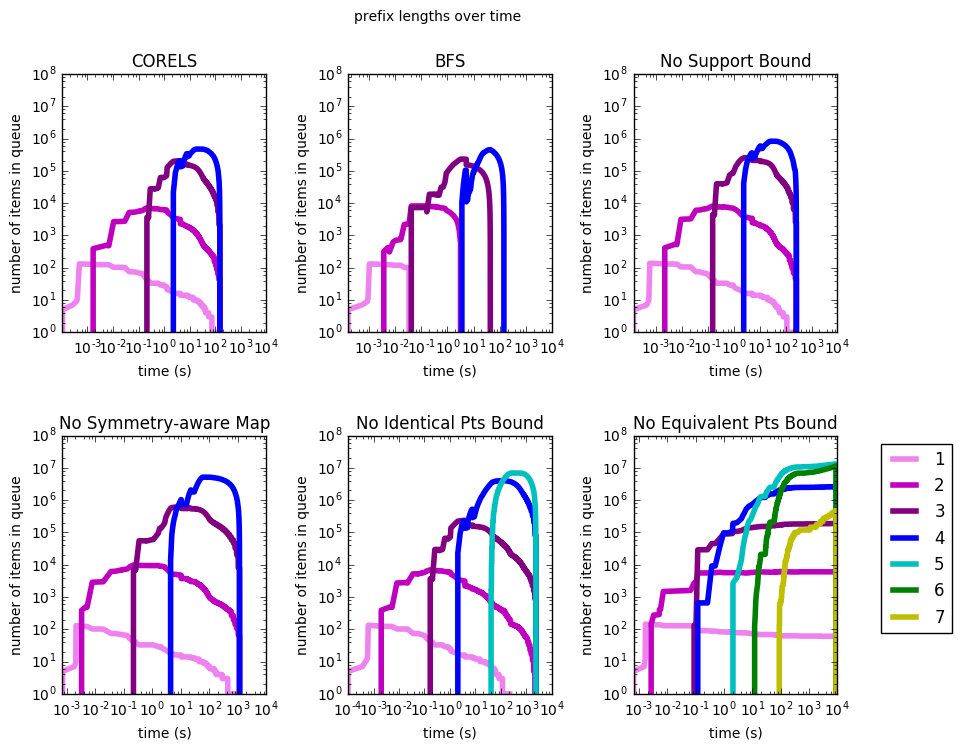

In [77]:
def prefix_lens_multi(dfs, titles):
    #fig = plt.figure(figsize=figsize)
    num_dfs = len(dfs)
    fig, axarr = plt.subplots(2, num_dfs / 2, figsize=(10,8))
    #ax = fig.add_subplot(111, **kwargs)
        #fig, ax = simple_ax()
    color_vec = ['k', 'violet', 'm', 'purple', 'b', 'c', 'g', 'y', 'orange', 'r']
    #color_vec = ['r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'm', 'violet', 'pink', 'gray', 'k']
    for i in range(num_dfs):
        df = dfs[i]
        title = titles[i]
        x = i / (num_dfs / 2)
        y = i % (num_dfs / 2)
        print title
        print x, y
        ax = axarr[x, y]
        prefix_lengths = list(df['prefix_lengths'])
        max_length = max(set([int(lc.split(':')[0]) for lc in ''.join(prefix_lengths).split(';') if lc]))
        split_hist = [[lc.split(':') for lc in lh.strip(';').split(';')] for lh in prefix_lengths][1:]
        lens = range(1, max_length + 1)
        kvp = [[(int(lc[0]), int(lc[1])) for lc in lh if (len(lc) == 2)] for lh in split_hist]
        zc = pd.DataFrame()
        z = []
        for pair in kvp:
            row = [0] * max_length
            for k,v in pair:
                if k > 0:
                    row[k - 1] = v
            z.append(row)
        zc = pd.DataFrame(z)
        print 'Max q', zc.sum(axis=1).max()
        print 'Max K', max_length
        zc.columns = range(1, max_length + 1)
        for length in range(1, max_length + 1):#[::-1]:
            jj = zc[length].nonzero()[0]
            tt = df['total_time'][jj]
            yy = zc.iloc[jj, length - 1]
            yy = np.array([1] + list(yy) + [1])
            tt = np.array([tt.iloc[0]] + list(tt) + [tt.iloc[-1]])
            ax.loglog(tt, yy, color=color_vec[length % len(color_vec)], linewidth=lw*2)
        ax.set_xlim([0, 10000])
        ax.set_ylim([0, 10 ** 8])
        ax.set_xlabel('time (s)')
        ax.set_ylabel('number of items in queue')
        ax.set_title(title)# + ' prefix lengths')
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.suptitle('prefix lengths over time')
    plt.legend(lens, bbox_to_anchor=(1.6, 1))
    plt.show()
prefix_lens_multi([corels_df, bfs_df, support_df, pmap_df, lookahead_df, equiv_df], 
                  ['CORELS', 'BFS', 'No Support Bound', 'No Symmetry-aware Map', 'No Identical Pts Bound', 
                   'No Equivalent Pts Bound'])

In [83]:
def prefix_lens(x, log_fname):
    
    for length in range(1, max_length + 1)[::-1]:
        jj = zc[:, length].nonzero()[0]
        tt = x['total_time'][jj]
        yy = zc[jj, length]
        if (ncomp < 3): 
            yy = np.array([1] + list(yy) + [1])
            tt = np.array([tt[0]] + list(tt) + [tt[-1]])
        else:
            yy = np.array([1] + list(yy))
            tt = np.array([tt[0]] + list(tt))
        pylab.loglog(tt, yy, color=color_vec[length % len(color_vec)], linewidth=lw*2)
    
    
    
    
    
    prefix_lengths = list(x['prefix_lengths'])
    if ('bfs' in log_fname):
        prefix_lengths = ['1:1;2:8721;3:4243;' if (pl == '2:8721;3:4243;') else pl for pl in prefix_lengths]

    max_length = max(set([int(lc.split(':')[0]) for lc in ''.join(prefix_lengths).split(';') if lc]))
    max_prefix_length = np.zeros((ntot, num_folds), int)
    max_prefix_length[ncomp, fold] = max_length
    print "max prefix length:", max_length
    split_hist = [[lc.split(':') for lc in lh.strip(';').split(';')] for lh in prefix_lengths]
    kvp = [[(lc[0], int(lc[1])) for lc in lh if (len(lc) == 2)] for lh in split_hist]
    z = tb.tabarray(kvpairs=kvp)
    assert ([int(name) for name in z.dtype.names] == range(max_length + 1))
    #zc = z.extract()[:, ::-1].cumsum(axis=1)[:, ::-1]
    zc = z.extract()
    if (ncomp == 0):
        queue_comp = zc.sum(axis=1)
        ii = queue_comp.nonzero()[0]
        queue_comp = queue_comp[ii]
        t_comp = x['total_time'][ii]

    max_q = zc.sum(axis=1).max()
    max_queue[ncomp, fold] = max_q
    print "max queue size (millions): ", max_q / 10**6.
        
    color_vec = ['k', 'violet', 'm', 'purple', 'b', 'c', 'g', 'y', 'orange', 'r']

    if (ncomp == 0): 
        pylab.clf()

    if (len(log_root_list) == 6): 
        pylab.subplot(2, 3, ncomp+1)
    else:
        pylab.subplot(2, 2, ncomp+1)

    for length in range(1, max_length + 1)[::-1]:
        jj = zc[:, length].nonzero()[0]
        tt = x['total_time'][jj]
        yy = zc[jj, length]
        if (ncomp < 3): 
            yy = np.array([1] + list(yy) + [1])
            tt = np.array([tt[0]] + list(tt) + [tt[-1]])
        else:
            yy = np.array([1] + list(yy))
            tt = np.array([tt[0]] + list(tt))
        pylab.loglog(tt, yy, color=color_vec[length % len(color_vec)], linewidth=lw*2)

    pylab.fill_between(t_comp, 10**-0.1 * np.ones(len(t_comp)), queue_comp, color='gray', alpha=0.3)

    for length in range(1, max_length + 1):
        jj = zc[:, length].nonzero()[0]
        tt = x['total_time'][jj]
        yy = zc[jj, length]
        if (ncomp + 1 < ntot):
            yy = np.array([1] + list(yy) + [1])
            tt = np.array([tt[0]] + list(tt) + [tt[-1]])
        else:
            yy = np.array([1] + list(yy))
            tt = np.array([tt[0]] + list(tt))
        pylab.loglog(tt, yy, color=color_vec[length % len(color_vec)], linewidth=lw*2)
        tx = 10**(np.log10(tt[0] + 0.1 * (np.log10(tt[-1] - np.log10(tt[0])))))
        ix = np.nonzero(tt < tx)[0][-1]
        if (length == 1):
            txt = pylab.text(tt[0] * 0.47, 1.5, '%d ' % length, fontsize=fs+4)
        else:
            txt = pylab.text(tt[0] * 0.4, 1.5, '%d ' % length, fontsize=fs+4)
    if (ncomp > ntot/2 - 1):
        pylab.xlabel('Time (s)', fontsize=fs+2)
    if (ncomp in [0, ntot/2]):
        pylab.ylabel('Count', fontsize=fs+2)
    (ymin, ymax) = (10**-0.1, 10**8.3)
    t_corels = int(np.round(t_comp[-1]))
    tmax = np.round(tt[-1])
    if (make_small):
        xloc = tmax / 5000
    else:
        xloc = tmax / 10000
    if (ncomp == 0):
        pylab.plot([t_corels, t_corels], [ymin, ymax], 'k--', linewidth=lw)
        if (make_small):
            xloc = 0.4
        else:
            xloc = 0.2
        pylab.text(xloc, 10**7.4, 'T $\\equiv$ %d s' % t_corels, fontsize=fs)
    else:
        if (tmax / t_corels) < 10:
            descr = '%d s $\\approx$ %1.1f T' % (np.round(tmax), tmax / t_corels)
        else:
            descr = '%d s $\\approx$ %d T' % (np.round(tmax), np.round(tmax / t_corels))
        if (ncomp == (ntot - 1)):
            descr = '> %s' % descr
            xloc = 0.02
        else:
            pylab.plot([tmax, tmax], [ymin, ymax], 'k--', linewidth=lw)
            descr = (14 - (len(descr.split('$')[0] + descr.split('$')[-1]) + 1)) * ' ' + descr
        pylab.text(xloc, 10**7.4, descr, fontsize=fs)
    #pylab.suptitle('lengths of prefixes in the logical queue\n', fontsize=fs)
    pylab.title(labels[ncomp], fontsize=fs+2)
    pylab.xticks(fontsize=fs-2)
    pylab.yticks(fontsize=fs-2)
    #pylab.loglog([1, 1], [10**-0.1, 10**8.3], 'k--')
    ax = [10**-4, 10**4, ymin, ymax]
    pylab.axis(ax)
    pylab.draw()
    if (ncomp + 1 == ntot):
        pylab.savefig('../figs/%s-queue.pdf' % ftag)
prefix_lens(corels_df, corels)       

NameError: global name 'ntot' is not defined

In [48]:
d = {}
for i in range(1, 8):
    pmap = '../logs/thesis/pmap/pmap_{0}_for-compas_1_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'.format(i)
    pmap_df = pd.read_csv(pmap)
    pmap_df.tail()
    print int(pmap_df['permutation_map_memory'].tail(1))
    print pmap_df['pmap_size'].tail(1)
    print int(pmap_df['total_time'].tail(1))
    d[i] = int(pmap_df['permutation_map_memory'].tail(1))
print d

190751744
1022    714944
Name: pmap_size, dtype: int64
154
185897576
1022    714944
Name: pmap_size, dtype: int64
150
148611880
1022    714944
Name: pmap_size, dtype: int64
148
68713960
1022    714944
Name: pmap_size, dtype: int64
147
70847100
1023    714939
Name: pmap_size, dtype: int64
164
62865376
882    714770
Name: pmap_size, dtype: int64
139
61184637
883    714944
Name: pmap_size, dtype: int64
141
{1: 190751744, 2: 185897576, 3: 148611880, 4: 68713960, 5: 70847100, 6: 62865376, 7: 61184637}


In [11]:
!ls ../logs/thesis/pmap/pmap_1

../logs/thesis/pmap/pmap_1


In [88]:
print corels_df['lower_bound_time'].tail(1) / corels_df['lower_bound_num'].tail(1)
print bfs_df['lower_bound_time'].tail(1) / bfs_df['lower_bound_num'].tail(1)
print support_df['lower_bound_time'].tail(1) / support_df['lower_bound_num'].tail(1)
print pmap_df['lower_bound_time'].tail(1) / pmap_df['lower_bound_num'].tail(1)
print lookahead_df['lower_bound_time'].tail(1) / lookahead_df['lower_bound_num'].tail(1)

1023    3.945366e-07
dtype: float64
763    3.761981e-07
dtype: float64
1375    4.122021e-07
dtype: float64
6574    3.689206e-07
dtype: float64
12050    3.839161e-07
dtype: float64


In [86]:
corels_df.columns

Index([u'total_time', u'evaluate_children_time', u'node_select_time',
       u'rule_evaluation_time', u'lower_bound_time', u'lower_bound_num',
       u'objective_time', u'tree_insertion_time', u'tree_insertion_num',
       u'queue_insetion_time', u'permutation_map_insertion_time',
       u'permutation_map_insertion_num', u'permutation_map_memory',
       u'current_lower_bound', u'tree_min_objective', u'tree_prefix_length',
       u'tree_num_nodes', u'tree_num_evaluated', u'tree_memory', u'queue_size',
       u'queue_min_length', u'queue_memory', u'pmap_size', u'pmap_null_num',
       u'pmap_discard_num', u'log_remaining_space_size', u'prefix_lengths'],
      dtype='object')

In [91]:
84382025575 / corels_df['lower_bound_num'].tail(1)

1023    844.733599
Name: lower_bound_num, dtype: float64

In [92]:
corels_df['lower_bound_num'].tail(1)

1023    99891878
Name: lower_bound_num, dtype: int64

In [67]:
def t_opt(df):
    #return df['tree_insertion_num'].tail(1)
    return  df[(df['tree_min_objective'].shift() != df['tree_min_objective'])].tail(1)['total_time']
print t_opt(corels_df)
print t_opt(bfs_df)
print t_opt(support_df)
print t_opt(pmap_df)
print t_opt(lookahead_df)
print t_opt(equiv_df)

55    7.96202
Name: total_time, dtype: float64
48    5.2432
Name: total_time, dtype: float64
61    10.7752
Name: total_time, dtype: float64
83    22.6778
Name: total_time, dtype: float64
55    7.5696
Name: total_time, dtype: float64
88    41.6263
Name: total_time, dtype: float64


In [109]:
bfs_df.columns

Index([u'total_time', u'evaluate_children_time', u'node_select_time',
       u'rule_evaluation_time', u'lower_bound_time', u'lower_bound_num',
       u'objective_time', u'tree_insertion_time', u'tree_insertion_num',
       u'queue_insetion_time', u'permutation_map_insertion_time',
       u'permutation_map_insertion_num', u'permutation_map_memory',
       u'current_lower_bound', u'tree_min_objective', u'tree_prefix_length',
       u'tree_num_nodes', u'tree_num_evaluated', u'tree_memory', u'queue_size',
       u'queue_min_length', u'queue_memory', u'pmap_size', u'pmap_null_num',
       u'pmap_discard_num', u'log_remaining_space_size', u'prefix_lengths'],
      dtype='object')

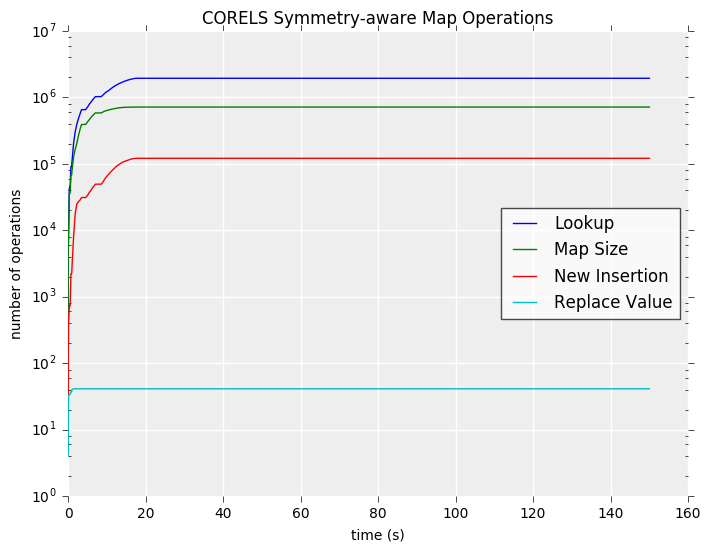

In [32]:
def ops(df, title):
    #PMAP
    fig, ax = simple_ax(figsize=(8,6))
    #pmap lookups
    ax.semilogy(df['total_time'], df['permutation_map_insertion_num'], label='Lookup')
    #pmap size
    ax.semilogy(df['total_time'], df['pmap_size'], label='Map Size')
    #pmap new insertions
    ax.semilogy(df['total_time'], df['pmap_null_num'], label='New Insertion')
    #pmap discards
    ax.semilogy(df['total_time'], df['pmap_discard_num'], label='Replace Value')
    plt.legend(fontsize=fs, framealpha=0.7, loc='best')
    plt.ylabel('number of operations')
    plt.xlabel('time (s)')
    plt.title(title + ' Symmetry-aware Map Operations')
    plt.show()
    #Queue
    """
    #Tree
    fig, ax = simple_ax(figsize=(8,6))
    #tree size
    ax.semilogy(df['total_time'], df['tree_num_nodes'], label='Tree Size')
    #tree new insertions
    ax.semilogy(df['total_time'], df['tree_insertion_num'], label='New Insertion')
    #tree evaluations
    ax.semilogy(df['total_time'], df['tree_num_evaluated'], label='Nodes evaluated')
    plt.legend(fontsize=fs, framealpha=0.7, loc='best')
    plt.ylabel('number of operations')
    plt.xlabel('time (s)')
    plt.title(title + ' Tree Operations')
    plt.show()"""
ops(corels_df, 'CORELS')

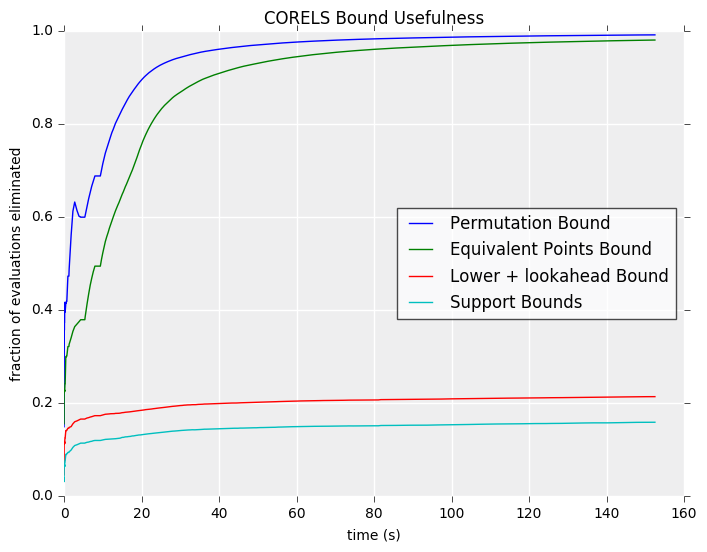

In [48]:
def elim_children(df, title):
    fig, ax = simple_ax(figsize=(8,6))
    eval_child = df['evaluate_children_num']
    ii = eval_child.nonzero()[0][0]
    scale = np.cast[float](eval_child[ii:]) * 155.0
    time = df['total_time'][ii::]
    #print df['tree_insertion_num'][ii::] / scale
    ax.plot(time, 1 - df['tree_insertion_num'][ii::] / scale, label='Permutation Bound')
    ax.plot(time, 1 - df['permutation_map_insertion_num'][ii::] / scale, label='Equivalent Points Bound')
    ax.plot(time, 1 - df['objective_num'][ii::] / scale, label='Lower + lookahead Bound')
    ax.plot(time, 1 - df['lower_bound_num'][ii::] / scale, label='Support Bounds')
    plt.legend(fontsize=fs, framealpha=0.7, loc='best')
    plt.ylabel('fraction of evaluations eliminated')
    plt.xlabel('time (s)')
    plt.title(title + ' Bound Usefulness')
    plt.show()
elim_children(corels_df, 'CORELS')

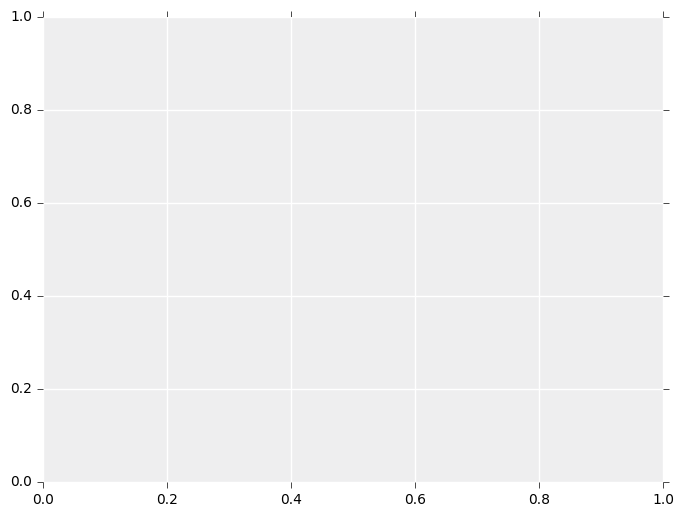

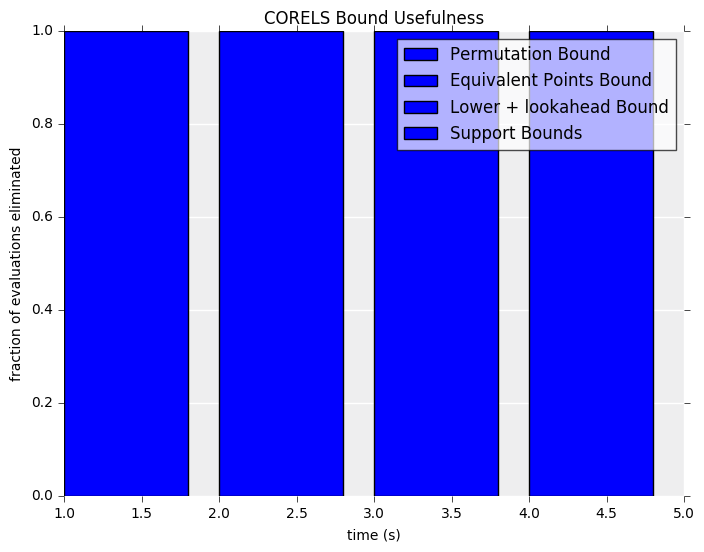

In [53]:
def elim_children_bar(df, title):
    fig, ax = simple_ax(figsize=(8,6))
    eval_child = df['evaluate_children_num']
    ii = eval_child.nonzero()[0][0]
    scale = np.cast[float](eval_child[ii:]) * 155.0
    time = df['total_time'][ii::]
    #print df['tree_insertion_num'][ii::] / scale
    tot = df['tree_insertion_num'][ii::] + df['permutation_map_insertion_num'][ii::] + df['objective_num'][ii::] + df['lower_bound_num'][ii::]
    max_tot = max(tot)
    ax.bar(1, 1 - max(df['tree_insertion_num'][ii::]) / max_tot, label='Permutation Bound')
    ax.bar(2, 1 - max(df['permutation_map_insertion_num'][ii::]) / max_tot, label='Equivalent Points Bound')
    ax.bar(3, 1 - max(df['objective_num'][ii::]) / max_tot, label='Lower + lookahead Bound')
    ax.bar(4, 1 - max(df['lower_bound_num'][ii::]) / max_tot, label='Support Bounds')
    plt.legend(fontsize=fs, framealpha=0.7, loc='best')
    plt.ylabel('fraction of evaluations eliminated')
    plt.xlabel('time (s)')
    plt.title(title + ' Bound Usefulness')
    plt.show()
elim_children_bar(corels_df, 'CORELS')

In [65]:
t_1 = '../logs/for-compas_1_train.out-bfs-with_prefix_perm_map-minor-removed=none-t=1-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
t_2 = '../logs/for-compas_1_train.out-bfs-with_prefix_perm_map-minor-removed=none-t=2-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
t_4 = '../logs/for-compas_1_train.out-bfs-with_prefix_perm_map-minor-removed=none-t=4-max_num_nodes=100000000-c=0.0050000-v=1-f=1000.txt'
t_1_df = pd.read_csv(t_1)
t_1_df.fillna('', inplace=True)
t_1_df.head()
t_2_df = pd.read_csv(t_2)
t_2_df.fillna('', inplace=True)
t_2_df.head()
t_4_df = pd.read_csv(t_4)
t_4_df.fillna('', inplace=True)
t_4_df.head()

,total_time,evaluate_children_time,node_select_time,rule_evaluation_time,lower_bound_time,lower_bound_num,objective_time,objective_num,tree_insertion_time,tree_insertion_num,...,tree_num_evaluated,tree_memory,queue_size,queue_min_length,queue_memory,pmap_size,pmap_null_num,pmap_discard_num,log_remaining_space_size,prefix_lengths
0,1.490160e+09,0.0,0.0,0.0,0.000000,0,0.000000,0,0.000000,1,...,0,8,0,0,0,0,0,0,1,0:1;
1,1.230240e-04,0.0,0.0,0.0,0.000008,1,0.000081,1,0.000000,1,...,0,10,0,0,0,0,0,0,159,0:1;
2,2.450940e-04,0.0,0.0,0.0,0.000009,2,0.000102,2,0.000015,2,...,0,154,1,0,8,1,0,0,159,0:1;1:1;
3,3.519060e-04,0.0,0.0,0.0,0.000013,9,0.000115,9,0.000021,9,...,0,1162,8,0,64,8,0,0,159,0:1;1:8;
4,4.730220e-04,0.0,0.0,0.0,0.000031,18,0.000126,18,0.000025,16,...,0,2170,15,0,128,15,0,0,159,0:1;1:15;


In [61]:
t_4_df['total_time'].tail()

797    71.5326
798    71.7287
799    71.7288
800    71.7301
801    71.7302
Name: total_time, dtype: float64

In [62]:
t_2_df['total_time'].tail()

771    100.747
772    101.153
773    101.153
774    101.156
775    101.156
Name: total_time, dtype: float64

In [66]:
t_1_df['total_time'].tail()

742    165.760
743    165.936
744    165.936
745    165.938
746    165.938
Name: total_time, dtype: float64

In [70]:
print t_opt(t_4_df)
print t_opt(t_2_df)
print t_opt(t_1_df)

53    0.165532
Name: total_time, dtype: float64
40    0.110491
Name: total_time, dtype: float64
18    0.18154
Name: total_time, dtype: float64


711
[711, 355, 177, 88, 44]
[1, 2, 4, 8, 16]


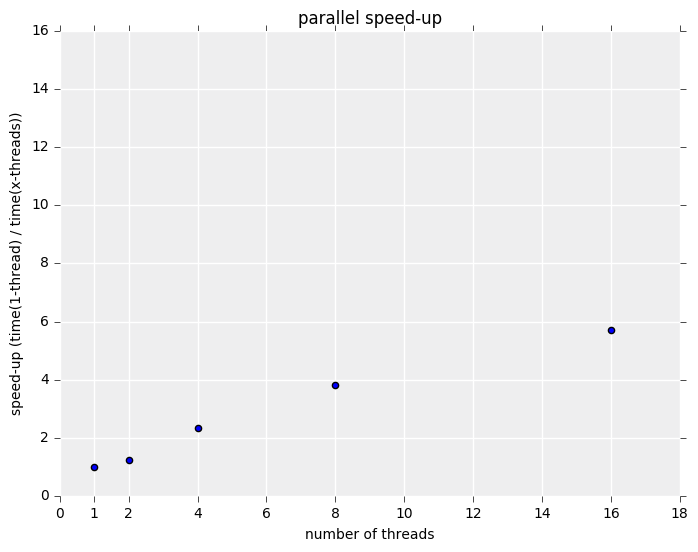

In [77]:
def parallel_timing():
    #x: num threads
    #y:(time(1-thread)/ time(x-threads)).
    fig, ax = simple_ax()
    threads = [1, 2, 4, 8, 16]
    times = [(690.348530, 731.797054), (512.555994, 641.239366), (401.768241, 210.302463), 
              (188.306405, 185.399279), (135.353158, 114.039676)]
    t_2 = [712.294370, 153.516872, 101.201599, 80.796937, 73.315465, 73.470032]
    avg_times = map(np.mean, times)
    #avg_times = t_2
    base = int(avg_times[0])
    end = int(avg_times[len(times) - 1])
    print base
    #xs = np.linspace(1, base, num=50)
    x = base
    xs = []
    ys = []
    for i in range(5):
        ys.append(2 ** i)
        xs.append(x)
        x /= 2
    #xs = np.logspace(np.log2(end), np.log2(base), num=32, base=2)
    print xs
    #print len(xs)
    #print (base / 35)
    #ys = map(lambda x: 16 - np.log2(x), xs)
    #ys = np.logspace(32, 1, num=32, base=2)
    #ys = np.logspace(4, 0, num=32, base=2)#35, 0.5, -float(34.5) / len(xs))
    print ys
    #print len(ys)
    #ax.set_yscale('log', basey=2)
    #ax.xaxis.set_major_locator(tick.MaxNLocator(integer=True))
    ax.scatter(threads, map(lambda x: avg_times[0] / x, avg_times))
    #ax.plot(xs, ys, label='Linear speedup')
    #s = tick.ScalarFormatter()
    #ax.yaxis.set_major_formatter(s)
    ax.set_ylim([0, 16])
    #ax.set_xtick(1)
    ax.set_ylabel('speed-up (time(1-thread) / time(x-threads))')
    ax.set_xlabel('number of threads')
    plt.xticks(list(plt.xticks()[0]) + [1])
    plt.title('parallel speed-up')
    plt.legend()
    plt.show()
parallel_timing()

In [65]:
corels_df['pmap_size'].tail(1)

882    714780
Name: pmap_size, dtype: int64

In [ ]:
# Without locking and no rehash
# 1 thread: 163.408903
# 2 threads: 80.872831
# 4 threads: 65.303310
# With locking and no rehash
# 1 thread: 162.676058
# 2 threads: 85.602045
# 4 threads: 71.974865
# With locking and rehash
# 1 161.228971
# 2 83.038869
# 4 70.243564